Phys281_Hw1
Created on Thursday Sept. 27 2018
Created by Xiaocheng Chen

Identify the problem:
    I will use Python in this problem set. First, to use loops to identify the next step of a particle's random walk, starting from origin in two dimensions, according to the given conditions. Then plot each position of the particle in an x-y diagram to stimulate the walk and show a prototype of the walk. Finally, analyse data from collecting the first passenger time (steps the particle takes to end the "walk") of 1000 stimulated random  walks; make a histrogram of these data to find out the probability distrubution of the first passenger time of the random walk.

the number of steps it took for the particle to be absorbed:  9158


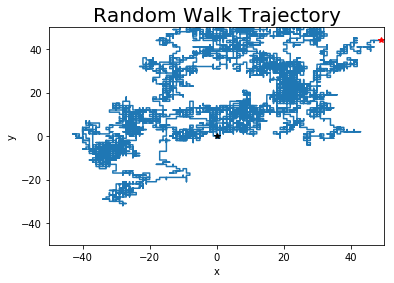

In [14]:
import numpy as np
import matplotlib.pyplot as plt

step = 0
a = 0
b = 0
L = []
X = []
Y = []
X.append(a)
Y.append(b)

def calWalk(x,y):
    K = []
    if x == -50 and (y == -50 or y == 50):        # particle at a corner
        p = np.random.randint(0,2)         
        if p == 0:                                # 50% in +x direction for both corners
            x += 1                         
        elif p == 1 and y == 50:                  # at upper left corner, 50% -y
            y -= 1                         
        elif p == 1 and y == -50:                 # at bottom left corner, 50% +y
            y += 1                         
    elif y == -50 or y == 50 or x == -50:         # particle on edge
        p = np.random.randint(0,2)
        if p == 0 and y == -50:                   # on bottom edge, 50% +y
            y += 1                       
        elif p == 0 and y == 50:                  # on upper edge, 50% -y 
            y -= 1
        elif p == 0 and x == -50:                 # on left edge, 50% +x
            x += 1
        elif p == 1:
            q = np.random.randint(0,2)            # create 25% possibility
            if q == 0 and (y == -50 or y == 50):  # on upper or bottom edge, 25% -x
                x -= 1
            elif q == 0 and x == -50:             # on left edge, 25% +y
                y += 1
            elif q == 1 and (y == -50 or y == 50):# on upper or bottom edge, 25% +x
                x += 1
            elif q == 1 and x == -50:             # on left edge, 25% -y
                y -= 1
    else:                                         # particle either at corner or on edge
        p = np.random.randint(0,4)
        if p == 0:                                # 25% +x
            x += 1
        elif p == 1:                              # 25% -x
            x -= 1
        elif p == 2:                              # 25% +y
            y += 1
        elif p == 3:                              # 25% -y
            y -= 1
    K.append(x)
    K.append(y)
    return K
    
while a!=50:                                      # particle not on the right edge
    L = calWalk(a,b)
    step += 1                                     # count the steps
    a = L[0]
    b = L[1]
    X.append(a)                                   # List of x position
    Y.append(b)                                   # List of y position

plt.plot(X,Y)                                     # plot the walk trajectory
plt.title('Random Walk Trajectory', fontsize = 20)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.plot(0,0,"k*")                                # mark the origin
plt.plot(X[step - 1],Y[step - 1],"r*")            # mark the end position
print("the number of steps it took for the particle to be absorbed: ",step)


Comments for Part 1: Use "if" to identify the next step of the particle in different situations. 
Store the x and y position of the particle at each step in two seperate arrays.
plot the trajectory according to the xy-positions, and accumulate the number of steps (time)

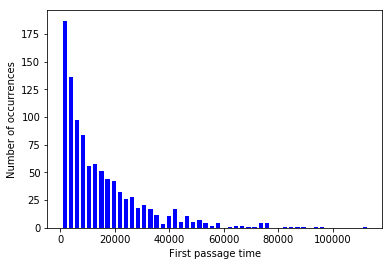

In [11]:
import numpy as np
import matplotlib.pyplot as plt

step = 0
a = 0
b = 0
L = []
Z = []
for N in range(1000):
    while a!=50:
        L = calWalk(a,b)
        step += 1
        a = L[0]
        b = L[1]
    Z.append(step)                                # List of steps each walk takes
    step = 0
    a = 0
    b = 0
        
n,bins,patches = plt.hist(Z,50,color='blue',rwidth=0.7) # plot the histogram
plt.xlabel('First passage time')
plt.ylabel('Number of occurrences')
plt.show()

Comments for Part B: Use a "for" loop to stimulate multiple(N = 1000) samples and make a histogram according to these samples. As shown in the histogram, the probability distribution function looks like an exponential decay in the form of $y = e^{-x}$.